In [1]:
from flipper import liteMap
import numpy as np
import matplotlib.pyplot as plt
import scipy
from cactusLib.cactusUtils import saveFits

RA0 = 3.
RA1 = 106.75
DEC0 = -56.2
DEC1 = -49.0

filename = "/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_v3_srcfree.fits"
lt = liteMap.liteMapFromFits(filename)



/home/cvargas/.local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
dx = 50
dy = 50

In [3]:
X0,Y0 = lt.skyToPix(RA0,DEC0)
X1,Y1 = lt.skyToPix(RA1,DEC1)

X0 = np.int(np.round(X0,0))
Y0 = np.int(np.round(Y0,0))
X1 = np.int(np.round(X1,0))
Y1 = np.int(np.round(Y1,0))

print X0,Y0,X1,Y1

10365 230 2884 1120


In [4]:
if X1>X0:
    X0 -= dx
    X1 += dx
else:
    X0 += dx
    X1 -= dx
if Y1>Y0:
    Y0 -= dy
    Y1 += dy
else:
    Y0 += dy
    Y1 -= dy

In [5]:
pad = 15
extraYPad = 0
apodNx = X0-X1
apodNy = Y1-Y0
apod = np.zeros((apodNy,apodNx))
apod[pad+extraYPad:apodNy-pad-extraYPad,pad:apodNx-pad] = 1.0
T_apod = scipy.ndimage.gaussian_filter(apod,10,mode="constant")

In [6]:
taper = lt.data*0.
taper[Y0:Y1,X1:X0] = T_apod

In [7]:
#%matplotlib auto

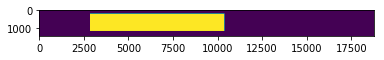

In [8]:
plt.imshow(taper)
plt.show()

In [9]:
nRA0,nDEC0 = lt.pixToSky(X0,Y0)
nRA1,nDEC1 = lt.pixToSky(X1,Y1)

In [ ]:
header = fits.getheader(filename)

In [10]:
saveFits(taper,"taper.fits",header)

In [11]:
print "mapLims = [{}, {}, {}, {}]".format(nRA0,nRA1,nDEC0,nDEC1)


mapLims = [2.302366548, 107.448395466, -56.6411003799, -48.6294323128]
